# Step : 1  Import all Necessary libraries

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")


# Step : 2 Load the Dataset

In [72]:
pd.set_option('display.max_columns',None)

In [73]:
dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [74]:
dataset.shape

(1470, 35)

# Step : 3 Data Exploration and Preprocessing

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [76]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Performing EDA (Exploratory Data Analysis)

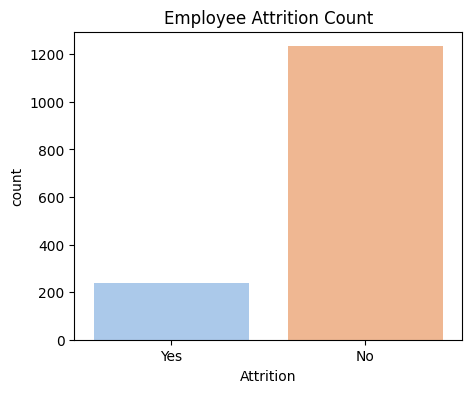

In [77]:
## Target Variable Distribution (Attrition)

plt.figure(figsize=(5,4))
sns.countplot(data=dataset, x='Attrition', palette='pastel')
plt.title('Employee Attrition Count')
plt.show()

In [78]:
# Percentage distribution
attrition_rate = dataset['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


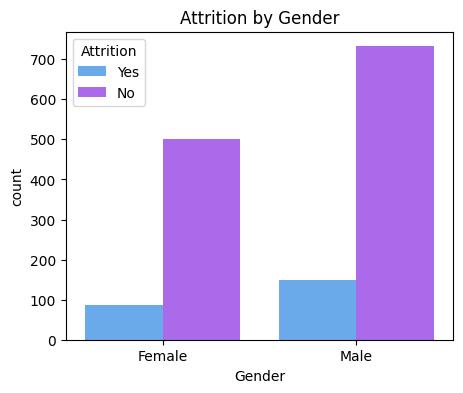

In [79]:
# Gender wise Attrition Distribution
plt.figure(figsize=(5,4))
sns.countplot(data=dataset, x='Gender', hue='Attrition', palette='cool')
plt.title('Attrition by Gender')
plt.show()

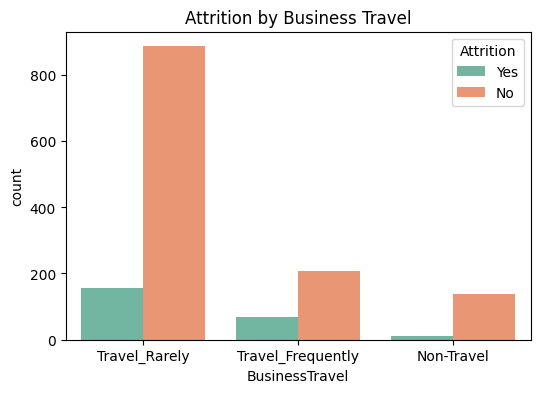

In [80]:
# Business Travel vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x='BusinessTravel', hue='Attrition', palette='Set2')
plt.title('Attrition by Business Travel')
plt.show()

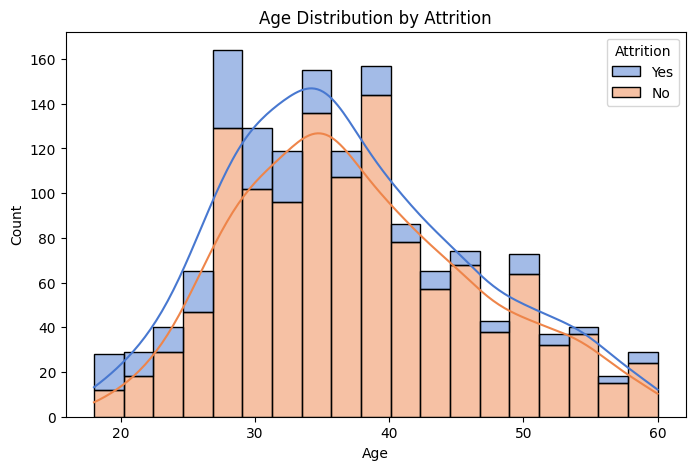

In [81]:
# Age Distribution by Attrition
plt.figure(figsize=(8,5))
sns.histplot(data=dataset, x='Age', hue='Attrition', kde=True, multiple='stack', palette='muted')
plt.title('Age Distribution by Attrition')
plt.show()

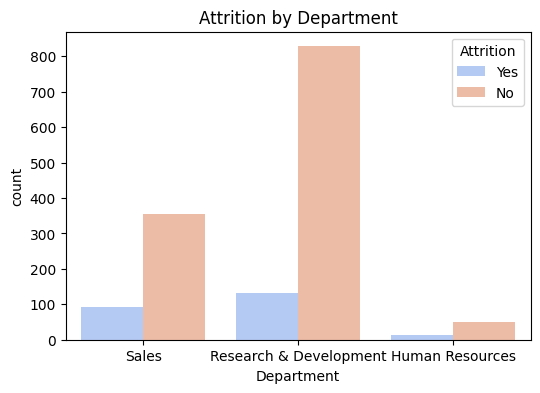

In [82]:
# Department wise Attrition
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x='Department', hue='Attrition', palette='coolwarm')
plt.title('Attrition by Department')
plt.show()

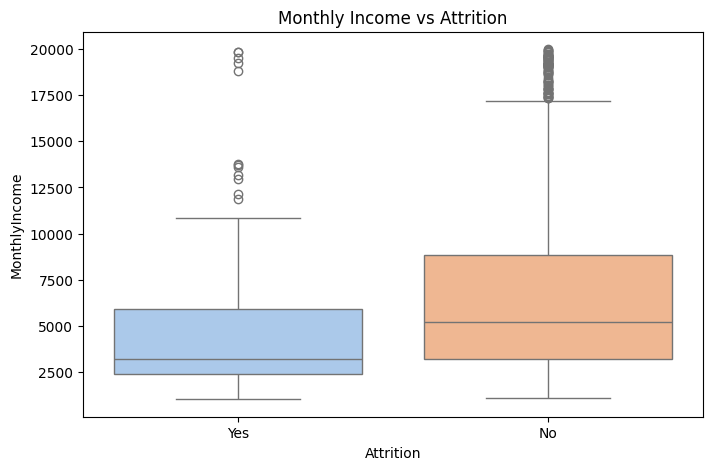

In [83]:
# Monthly Income vs Attrition
plt.figure(figsize=(8,5))
sns.boxplot(data=dataset, x='Attrition', y='MonthlyIncome', palette='pastel')
plt.title('Monthly Income vs Attrition')
plt.show()

In [84]:
# IQR Calculation for Monthly Income
Q1 = dataset['MonthlyIncome'].quantile(0.25)
Q3 = dataset['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

Lower limit: -5291.0
Upper limit: 16581.0


In [85]:
dataset = dataset[(dataset['MonthlyIncome'] >= lower_limit) & (dataset['MonthlyIncome'] <= upper_limit)]
print("Dataset shape after removing outliers:", dataset.shape)

Dataset shape after removing outliers: (1356, 35)


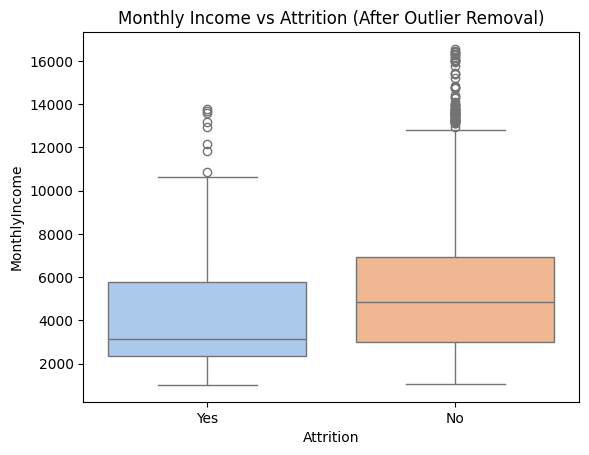

In [86]:
sns.boxplot(data=dataset, x='Attrition', y='MonthlyIncome', palette='pastel')
plt.title('Monthly Income vs Attrition (After Outlier Removal)')
plt.show()

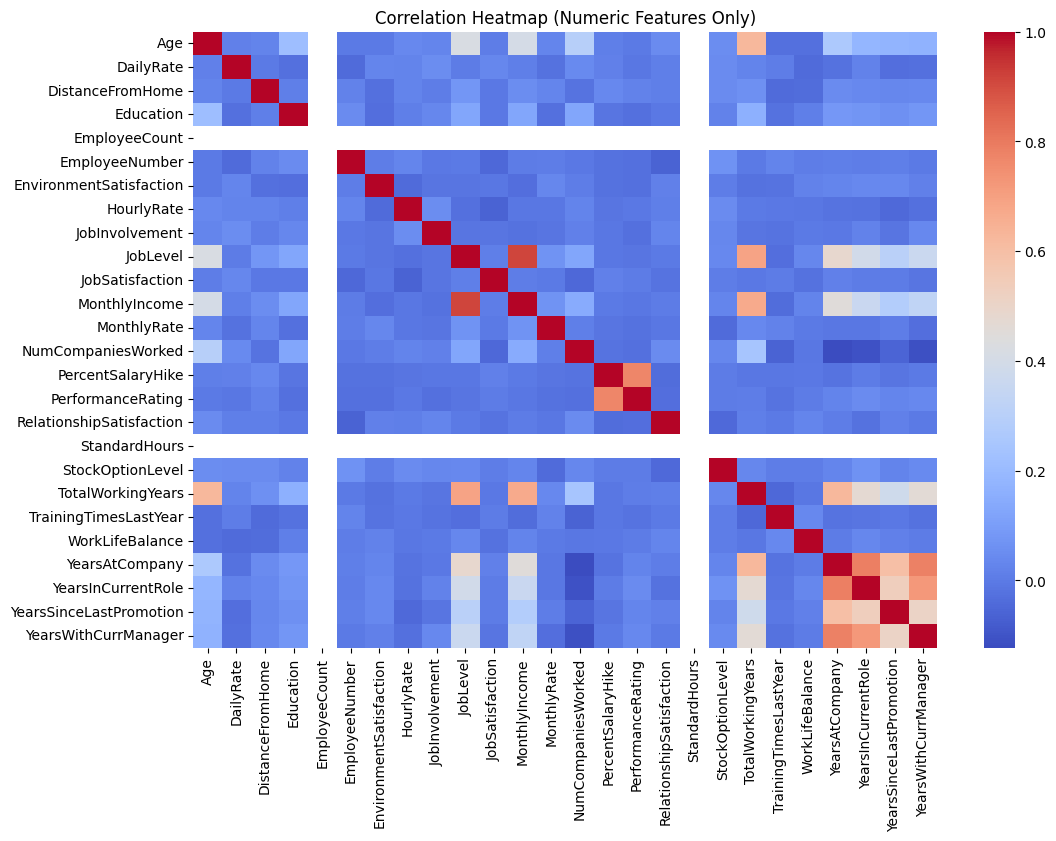

In [89]:
# Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(dataset.select_dtypes(include=['int64','float64']).corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [90]:
# Checking for missing values
dataset.isnull().sum().sum()

np.int64(0)

In [91]:
# Checking for duplicate records
dataset.duplicated().sum()

np.int64(0)

### Label Encoding

In [92]:
dataset['Attrition'] = dataset['Attrition'].map({'Yes': 1, 'No': 0})

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset["BusinessTravel"] = le.fit_transform(dataset["BusinessTravel"])
dataset["Department"] = le.fit_transform(dataset["Department"])
dataset["EducationField"] = le.fit_transform(dataset["EducationField"])
dataset["Gender"] = le.fit_transform(dataset["Gender"]) 
dataset["JobRole"] = le.fit_transform(dataset["JobRole"])
dataset["MaritalStatus"] = le.fit_transform(dataset["MaritalStatus"])
dataset["OverTime"] = le.fit_transform(dataset["OverTime"])


#### Dropping unwanted columns


In [94]:
dataset = dataset.drop(columns=["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours", "DailyRate", "HourlyRate"])      
dataset.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


# Step: 4 Define the Target and Input Feature

In [95]:
x = dataset.drop(columns="Attrition")
y = dataset["Attrition"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1356, dtype: int64

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Step : 5 Model Training and Evalution

### DecisionTreeClassifier

In [97]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [98]:
y_pred = model.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7573529411764706
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       224
           1       0.35      0.46      0.40        48

    accuracy                           0.76       272
   macro avg       0.62      0.64      0.62       272
weighted avg       0.78      0.76      0.77       272

Confusion Matrix:
 [[184  40]
 [ 26  22]]


In [100]:
model.score(x_test, y_test)*100, model.score(x_train, y_train)*100

(75.73529411764706, 100.0)

### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [102]:
y_pred_lr = lr.predict(x_test)

In [103]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8272058823529411
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       224
           1       1.00      0.02      0.04        48

    accuracy                           0.83       272
   macro avg       0.91      0.51      0.47       272
weighted avg       0.86      0.83      0.75       272

Logistic Regression Confusion Matrix:
 [[224   0]
 [ 47   1]]


In [104]:
lr.score(x_test, y_test)*100, lr.score(x_train, y_train)*100


(82.72058823529412, 83.21033210332104)

### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [106]:
y_pred_rf = rf.predict(x_test)

In [107]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [108]:
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8455882352941176
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       224
           1       0.88      0.15      0.25        48

    accuracy                           0.85       272
   macro avg       0.86      0.57      0.58       272
weighted avg       0.85      0.85      0.80       272

Random Forest Confusion Matrix:
 [[223   1]
 [ 41   7]]


In [109]:
rf.score(x_test, y_test)*100, rf.score(x_train, y_train)*100


(84.55882352941177, 100.0)

## Define the models and their scores


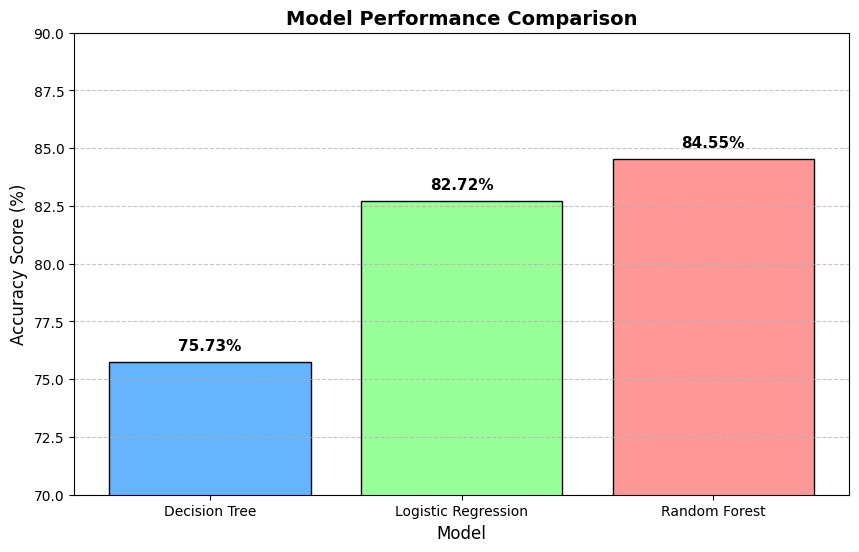

In [113]:
models = ['Decision Tree', 'Logistic Regression', 'Random Forest']
scores = [75.73, 82.72, 84.55]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color=['#66b3ff', '#99ff99', '#ff9999'], edgecolor='black')

# Add text labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{bar.get_height():.2f}%", ha='center', fontsize=11, fontweight='bold')

# Add titles and labels
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Score (%)', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(70, 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()